# Demo

This notebook presents results of our method on 6 samples (4 succeeded and 2 failure). Please refer to our final report for the evaluation of the model on the entire testset.

Note that this notebook works on python2 as explained in the README file.


In [1]:
%matplotlib notebook
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import json
import os
import collections
import math

In [2]:
pr= open ('our_answers.dms','r')
preds=pickle.load(pr)
pr.close()
ans= open ('trainval_label2ans.pkl','r')
labels=pickle.load(ans)
ans.close()

In [3]:
def original_question(k):
    dataset_root = '/datasets/ee285f-public/VQA2017/v2_OpenEnded_mscoco_val2014_questions.json'
    q_ids=[42000,73001,74001,133000,136001,73000]
    with open(dataset_root) as f:
        c = list(json.load(f)['questions'])
        for i in range(len(c)):
            if c[i]['question_id']==q_ids[k]:
                print('Question is:')
                print(c[i]['question'])
                break


In [4]:
def my_answer(k):
    pred=preds[k].data
    pred=pred.cpu().numpy()
    idx=np.argmax(pred)
    print('')
    print('The network answer is:')
    print(labels[idx])

In [5]:
def original_image(k):
    dataset_root_dir = '/datasets/ee285f-public/VQA2017/val2014'
    img_ids=['000000000042','000000000073','000000000074','000000000133','000000000136','000000000073']
    img_path = os.path.join(dataset_root_dir, 'COCO_val2014_'+img_ids[k]+'.jpg') 
    img = Image.open( img_path ).convert('RGB')
    plt.figure()
    plt.imshow(img)

In [6]:
def correct_answer(k):
    dataset_root = '/datasets/ee285f-public/VQA2017/v2_mscoco_val2014_annotations.json'
    q_ids=[42000,73001,74001,133000,136001,73000]
    with open(dataset_root) as f:
        c = list(json.load(f)['annotations'])
        for i in range(len(c)):
            if c[i]['question_id']==q_ids[k]: 
                mylist=[]
                for j in range(10):
                    mylist.append(c[i]['answers'][j]['answer'])    
                counter=collections.Counter(mylist)
                print('\npeople answers are/is:')
                for obj in counter.keys():
                    print(obj)
                print('\nconfidence level of people answers is:')
                print(np.array(counter.values())/10.)
                break



## Success sample 1:

Test image number 1:


<IPython.core.display.Javascript object>


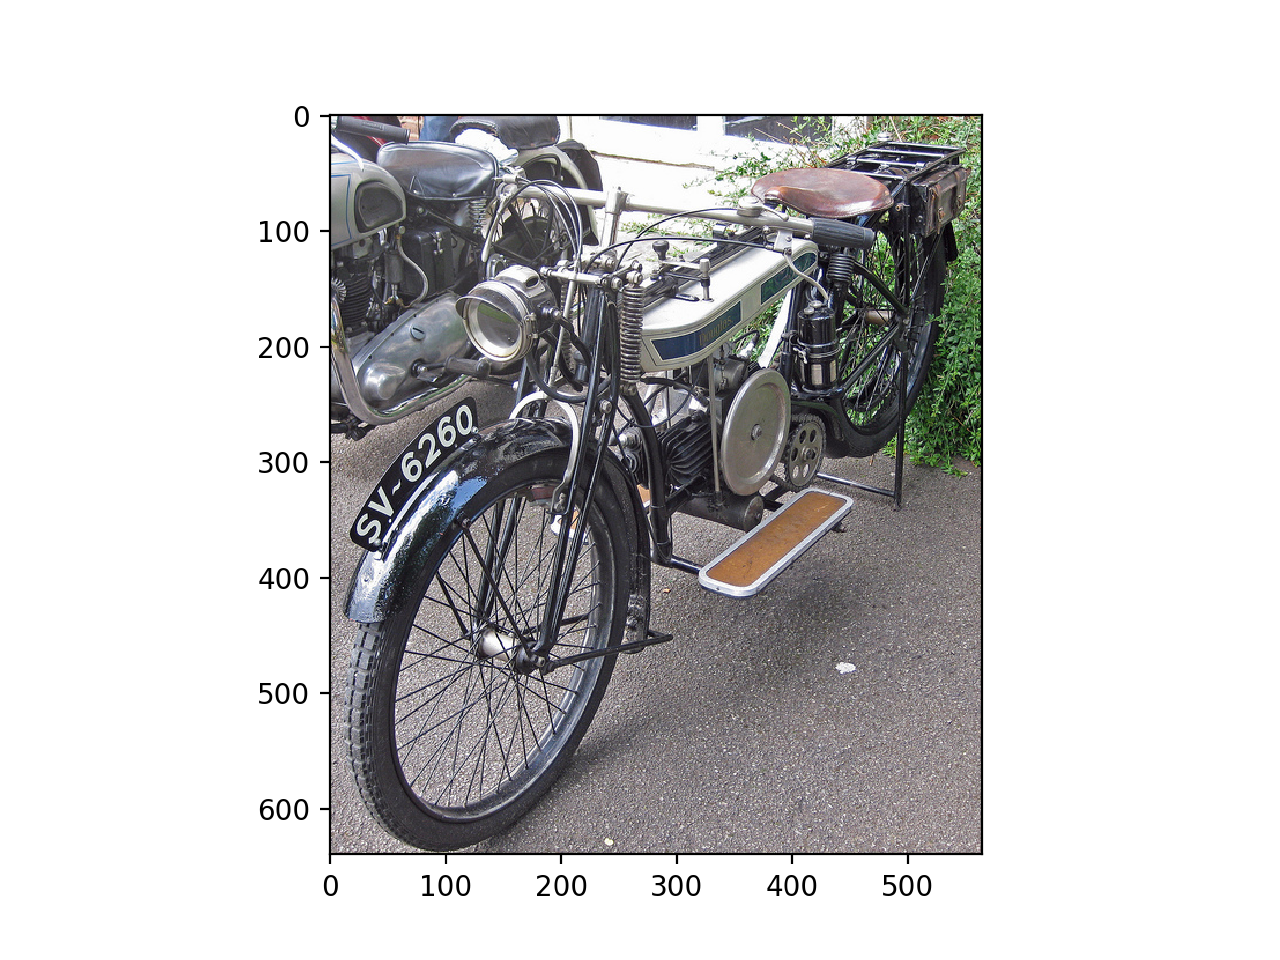

Question is:
Is this a motorcycle or bike?

The network answer is:
motorcycle

people answers are/is:
bike
motorcycle

confidence level of people answers is:
[0.4 0.6]


In [7]:
print('Test image number 1:')
original_image(1)
original_question(1)
my_answer(2)
correct_answer(1)

## Success sample 2:

Test image number 2:


<IPython.core.display.Javascript object>


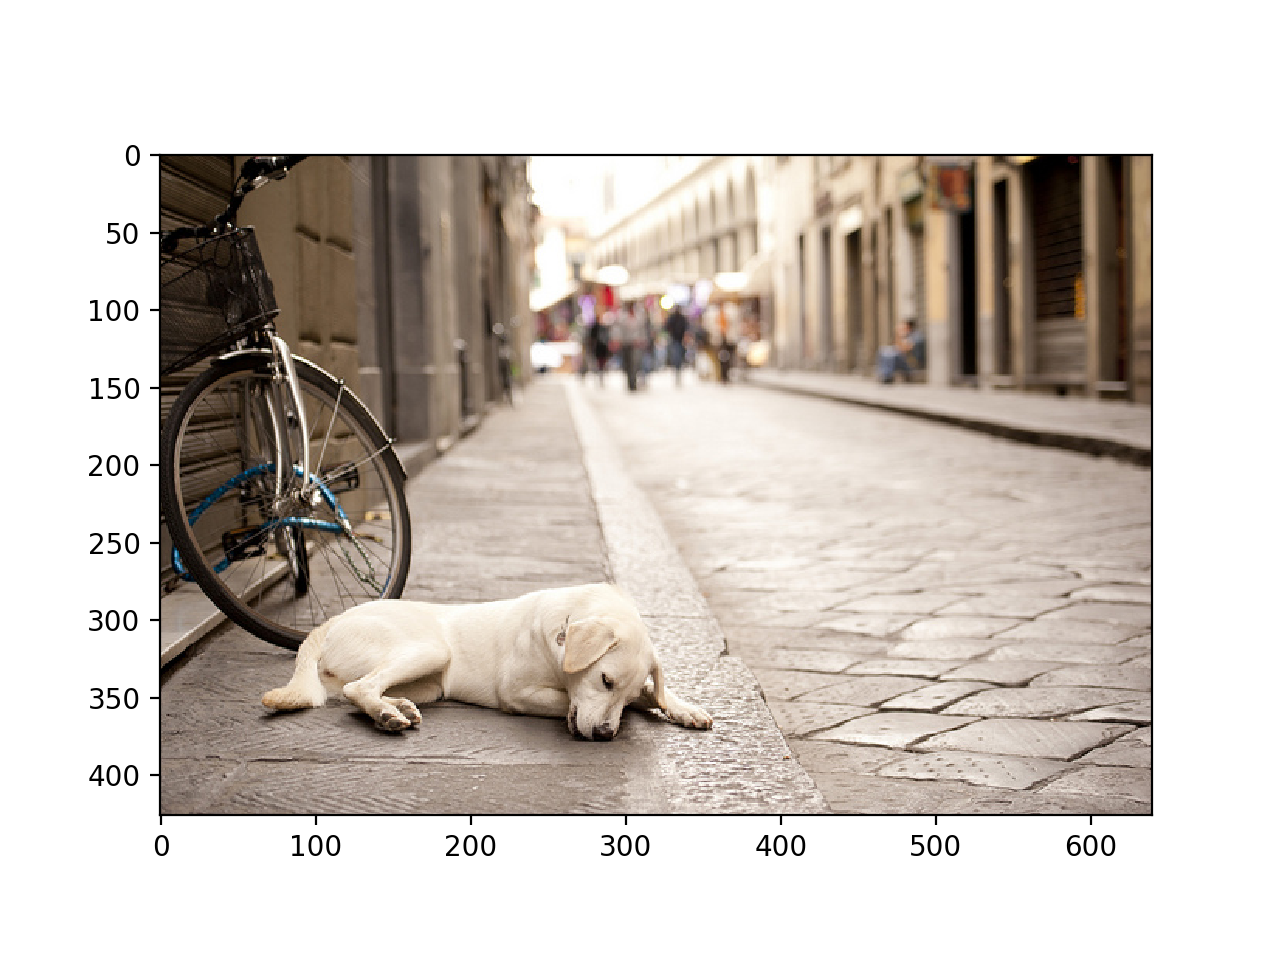

Question is:
Where is the dog laying?

The network answer is:
sidewalk

people answers are/is:
outside
street
yes
sidewalk
ground

confidence level of people answers is:
[0.1 0.1 0.1 0.6 0.1]


In [8]:
print('Test image number 2:')
original_image(2)
original_question(2)
my_answer(3)
correct_answer(2)

## Success sample 3:

Test image number 3:


<IPython.core.display.Javascript object>


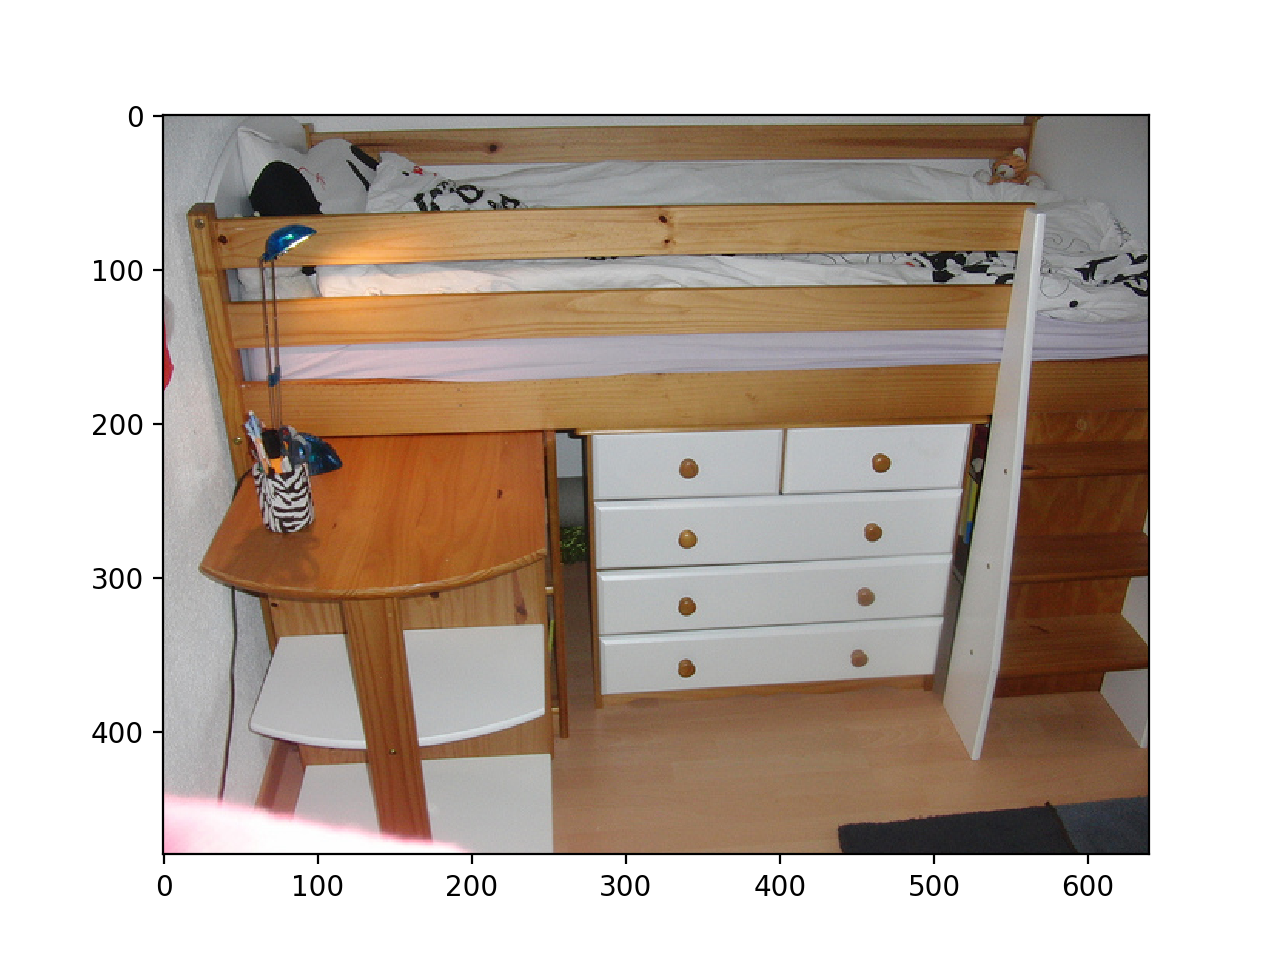

Question is:
What color is lamp?

The network answer is:
blue

people answers are/is:
blue

confidence level of people answers is:
[1.]


In [9]:
print('Test image number 3:')
original_image(3)
original_question(3)
my_answer(4)
correct_answer(3)

## Success sample 4:

Test image number 4:


<IPython.core.display.Javascript object>


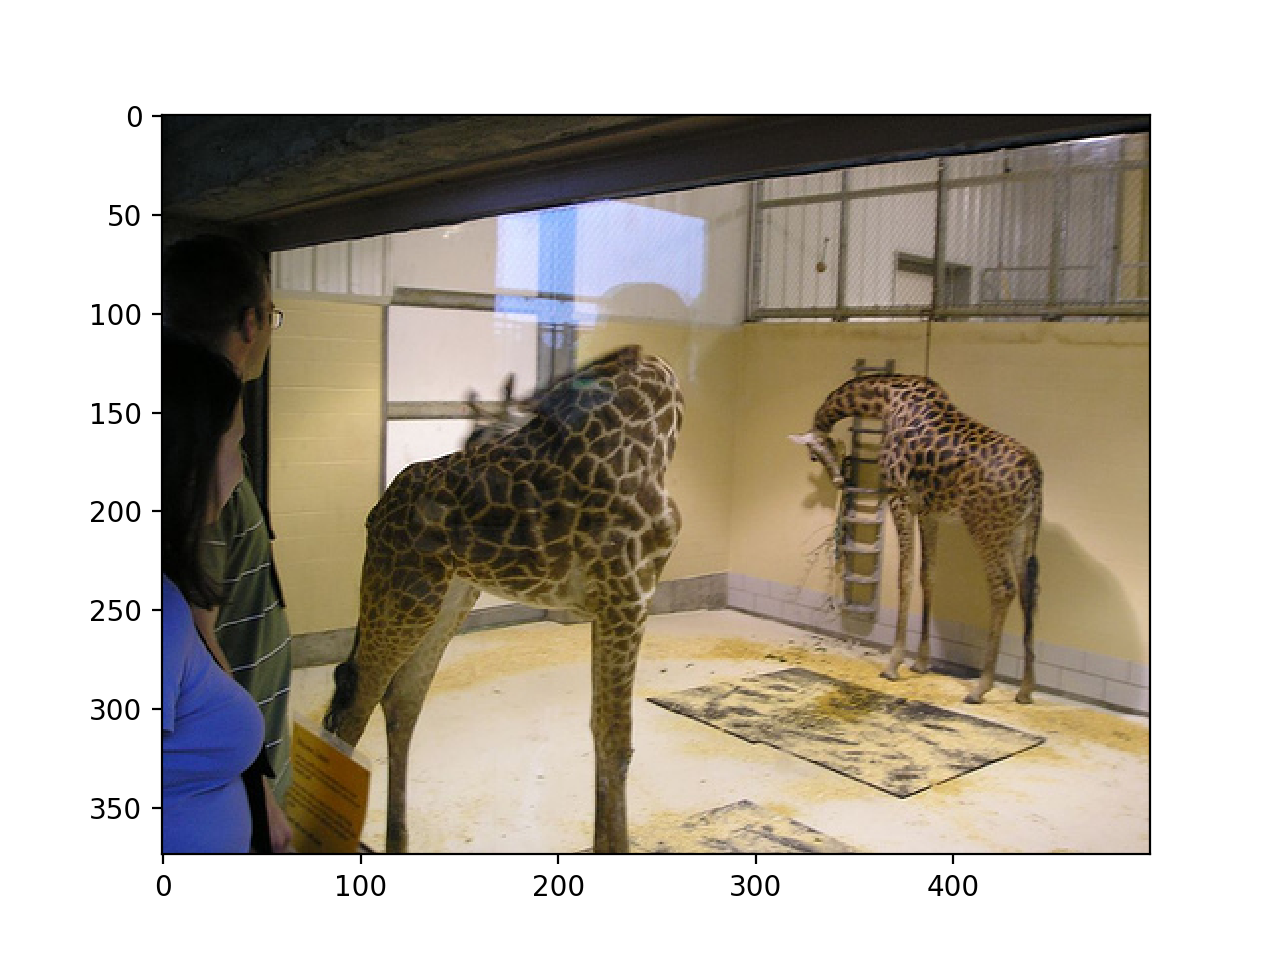

Question is:
How many animals are in the picture?

The network answer is:
2

people answers are/is:
2

confidence level of people answers is:
[1.]


In [10]:
print('Test image number 4:')
original_image(4)
original_question(4)
my_answer(5)
correct_answer(4)

## Fialure example 1:

Test image number 4:


<IPython.core.display.Javascript object>


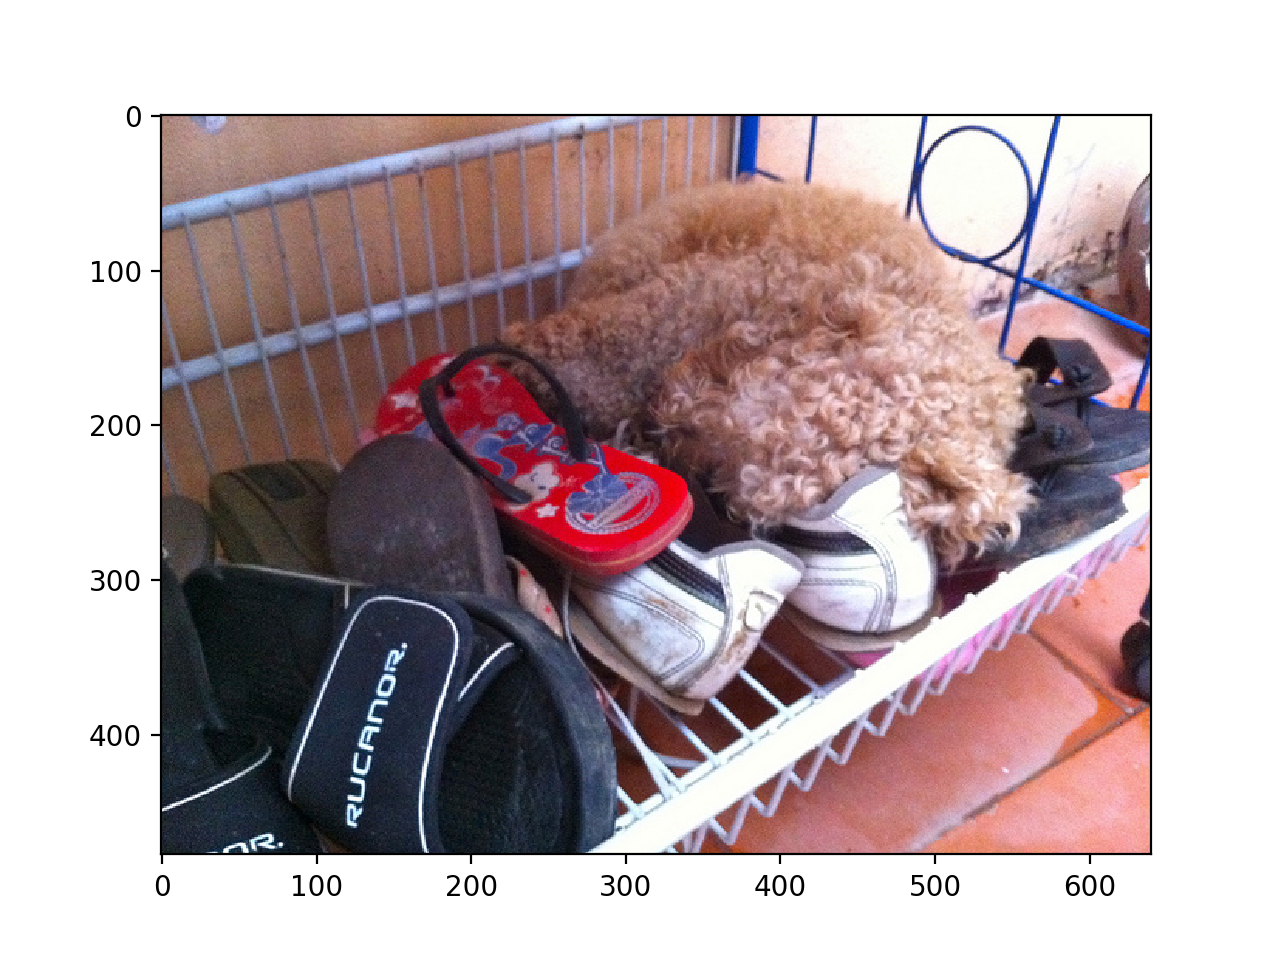

Question is:
What color are the gym shoes?

The network answer is:
red

people answers are/is:
white
white and black

confidence level of people answers is:
[0.9 0.1]


In [11]:
print('Test image number 4:')
original_image(0)
original_question(0)
my_answer(0)
correct_answer(0)


## Failure sample 2:

Test image number 5:


<IPython.core.display.Javascript object>


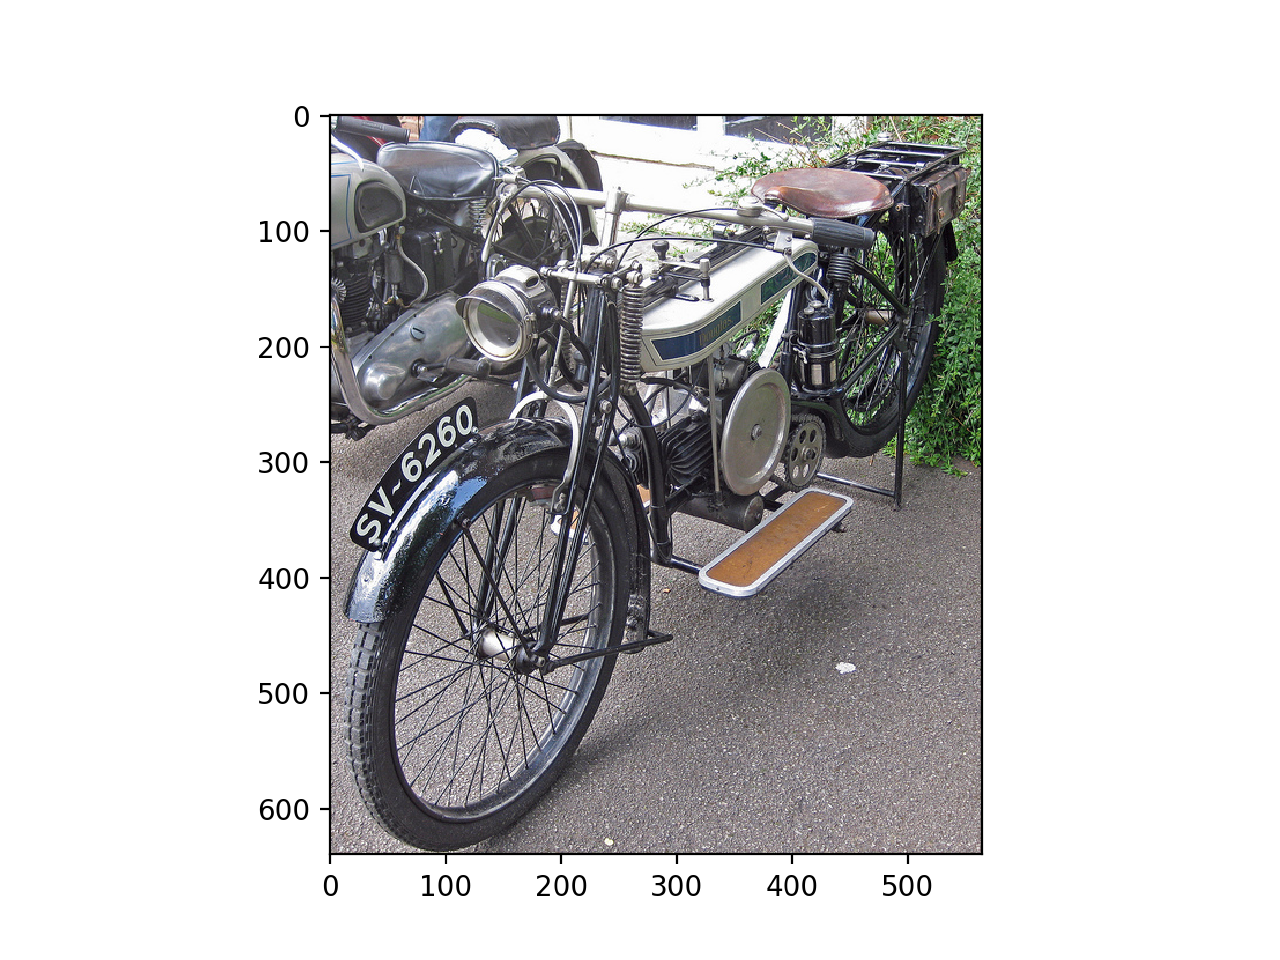

Question is:
What is the license number?

The network answer is:
yes

people answers are/is:
sv 6260
sv-6260
6260

confidence level of people answers is:
[0.1 0.7 0.2]


In [12]:
print('Test image number 5:')
original_image(5)
original_question(5)
my_answer(1)
correct_answer(5)